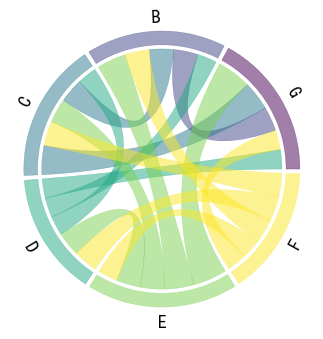

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_chord_diagram import chord_diagram

flux_data = np.array([
    [0, 5, 6, 4, 7, 4],
    [5, 0, 5, 4, 6, 5],
    [6, 5, 0, 4, 5, 5],
    [4, 4, 4, 0, 5, 5],
    [7, 6, 5, 5, 0, 4],
    [4, 5, 5, 5, 4, 0],
])
names = ["G","B","C","D","E","F"]

fig,ax = plt.subplots(figsize=(4,3.5),dpi=100,facecolor="w")
#alpha表示透明度，范围为（0,1），ax=ax是让框和图在一起，如果去掉，会分开显示
chord_diagram = chord_diagram(mat=flux_data,names=names, alpha=0.5,ax=ax)
#防止多图时的重叠
plt.tight_layout()
plt.show()


In [5]:
#导入模块
from pyecharts import options as opts
from pyecharts.charts import Bar,Line,Scatter
#准备数据
l1=['星期一','星期二','星期三','星期四','星期五','星期六','星期日']
l2=[100,200,300,400,500,400,300]
l3=[200,300,400,500,600,500,400]

#绘制柱状交互图
bar = (
    Bar()
    .add_xaxis(l1)#x轴数据
    .add_yaxis(y_axis=l2,series_name='y轴1')#y轴1数据,设置图例名字
    .add_yaxis(y_axis=l3,series_name='y轴2')#y轴2数据，设置图例名字
    # 设置标题和图例
    .set_global_opts(title_opts=opts.TitleOpts(title="柱状图-基本示例",pos_left="center" ),
                     legend_opts=opts.LegendOpts(pos_left="left"))
)
bar.render('a1.html')

#绘制折线交互图
line=(
    Line()
    .add_xaxis(xaxis_data=l1)
    .add_yaxis(y_axis=l2,series_name="y轴1")
    .add_yaxis(y_axis=l3,series_name='y轴2')
    .set_global_opts(title_opts=opts.TitleOpts(title='折线图-基本示例',pos_left="center" ),
                     legend_opts=opts.LegendOpts(pos_left="left"))
)
line.render('b1.html')

#绘制散点交互图
c =(Scatter()     
.add_xaxis(l1)
.add_yaxis(y_axis=l2,series_name="y轴1")
.add_yaxis(y_axis=l3,series_name='y轴2')
.set_global_opts(title_opts=opts.TitleOpts(title='散点图-基本示例',pos_left="center" ), 
                 legend_opts=opts.LegendOpts(pos_left="left"))
)
c.render('c1.html')


'c:\\Users\\Hwh\\Desktop\\Code\\Python\\visual\\c1.html'

In [34]:
import pandas as pd
import holoviews as hv
import numpy as np
from holoviews import opts, dim
from bokeh.plotting import show
from bokeh.models import Text  # 确保导入Text类

# 修改后的钩子函数 - 确保在钩子函数内部导入Text
def rotate_labels_hook(plot, element):
    try:
        # 动态导入Text - 确保名称作用域正确
        from bokeh.models import Text
        
        # 获取Bokeh绘图对象
        p = plot.state
        
        # 定位所有文本渲染器
        for renderer in p.renderers:
            # 添加额外的检查确保renderer有glyph属性
            if hasattr(renderer, 'glyph'):
                # 检查是否为文本对象
                if isinstance(renderer.glyph, Text):
                    # 设置所有标签为水平
                    renderer.glyph.angle = 0
                    renderer.glyph.angle_units = 'deg'
                    # 调整标签位置避免重叠
                    renderer.glyph.y_offset = 8
                    # 调整标签文本对齐方式
                    renderer.glyph.text_align = 'center'
                    renderer.glyph.text_baseline = 'middle'
                    
                    # 调整字体大小避免重叠
                    renderer.glyph.text_font_size = "8pt"
                    
                    # 输出调试信息
                    # print(f"Updated label renderer: {renderer.name}")
    except Exception as e:
        print(f"钩子函数执行时出错: {e}")

# 读取数据
df = pd.read_excel('共现图.xlsx', sheet_name='Sheet1')
# 前50的共现频率数据 - 假设前3列是关键词1、关键词2、共现频率
data = df.iloc[0:50, :3].copy()
data.columns = ['source', 'target', 'value']  # 重命名列名符合holoviews要求

# 提取唯一节点 - 从源和目标列中提取
all_nodes = pd.concat([data['source'], data['target']]).unique()
nodes = hv.Dataset(pd.DataFrame(all_nodes, columns=['index']), 'index')

# 创建Chord图
chord = hv.Chord((data, nodes))

# 设置图形参数
chord.opts(
    opts.Chord(
        cmap='Category20',
        edge_cmap='Blues',
        height=1000,
        width=1000,
        # 使用dim创建动态标签
        labels=dim('index').str(),
        edge_color=dim('value'),    # 移除.str()，确保数值类型
        node_color=dim('index').str(),
        edge_visible=True,
        # 减小字体大小避免重叠
        label_text_font_size='8pt',  # 调整为较小字体
        # 其他设置
        colorbar=True,
        colorbar_position='bottom',
        # 钩子函数必须放在列表中
        hooks=[rotate_labels_hook],
        # 添加更多间距选项
        padding=0.15,  # 增加填充减少标签重叠
        # 禁用节点选择避免干扰
        selection_fill_alpha=0
    )
)

# 渲染并显示图形
show(hv.render(chord))

# 保存为HTML文件
hv.save(chord, 'overlay1.html', fmt='html')

ValueError: In opts.Chord(...), unexpected option 'selection_fill_alpha' for Chord type across all extensions. Similar options for current extension ('bokeh') are: ['edge_selection_fill_alpha', 'node_nonselection_fill_alpha', 'node_selection_fill_alpha'].

In [48]:
import plotly.graph_objects as go  # 导入 plotly 中的图形对象模块作为 go
import numpy as np  # 导入 numPy 数学库作为 np

# 创建网格数据
x = np.linspace(-10, 10, 50)  # 在 -5 到 5 之间生成 50 个均匀间隔的 x 值
y = np.linspace(-10, 10, 50)  # 在 -5 到 5 之间生成 50 个均匀间隔的 y 值
x, y = np.meshgrid(x, y)  # 创建 x、y 坐标网格，#绘制三维曲面图时需要这行代码
z = np.tan(np.sqrt(x**3 / y**2))  # 计算 z 值，使用 sin 函数在二维平面上以 (x, y) 距原点的距离为自变量

# 创建3D表面图
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])  # 创建一个 3D 表面图，使用 z 值、x 值、y 值作为数据

# 设置图表布局
fig.update_layout(
    title='3D 表面图示例',  # 设置图表标题
    scene=dict(
        xaxis_title='X 轴',  # 设置 x 轴标题
        yaxis_title='Y 轴',  # 设置 y 轴标题
        zaxis_title='Z 轴'   # 设置 z 轴标题
    )
)
# 显示图表
fig.show()  # 显示生成的图表


C:\Users\Hwh\AppData\Local\Temp\ipykernel_1352\2491756949.py:8: RuntimeWarning:

invalid value encountered in sqrt



In [54]:
import plotly.express as px
# 示例数据：经纬度和温度
data = [
    {'lat': 40.7128, 'lon': -74.0060, 'temperature': 22.5},  # 纽约
    {'lat': 34.0522, 'lon': -118.2437, 'temperature': 28.3},  # 洛杉矶
    {'lat': 51.5074, 'lon': -0.1278, 'temperature': 18.9},  # 伦敦
    {'lat': 39.9042, 'lon': 116.4074, 'temperature': 25.7},  # 北京
    {'lat': 31.2304, 'lon': 121.4737, 'temperature': 27.2},  # 上海
    {'lat': 35.6895, 'lon': 139.6917, 'temperature': 23.8},  # 东京
    {'lat': -22.9068, 'lon': -43.1729, 'temperature': 29.1},  # 里约热内卢
    {'lat': -33.8688, 'lon': 151.2093, 'temperature': 21.6},  # 悉尼
    {'lat': 55.7558, 'lon': 37.6176, 'temperature': 19.3},  # 莫斯科
    {'lat': 49.2827, 'lon': -123.1207, 'temperature': 16.8},  # 温哥华
]

# 创建地图图表
fig = px.scatter_geo(data,
                     lat='lat',
                     lon='lon',
                     text='temperature',
                     hover_name='temperature',
                     title='全球温度分布',
                     scope='world')

# 自定义温度点的样式和标签
fig.update_traces(marker=dict(size=12, color='red', opacity=0.7),
                  textfont=dict(size=10, color='white'))

# 显示图表
fig.show()


In [55]:
import plotly.express as px

# 中国各水系的经纬度坐标点
chinese_water_systems = {
    "Yangtze River": [(111.9777, 28.6568), (121.3997, 31.2374)],
    "Yellow River": [(95.9777, 37.1568), (116.3997, 38.2374)],
    # 在这里添加更多水系及其坐标点
}

# 将数据存于列表中
data = []
for system, coords in chinese_water_systems.items():
    for coord in coords:
        data.append({
            'System': system,
            'Longitude': coord[0],
            'Latitude': coord[1]
        })
print(data)

# 使用plotly.express创建地图图表
fig = px.line_geo(data, lon='Longitude', lat='Latitude', color='System',
                  title='China Water Systems')

# 设置地图样式
fig.update_geos(showland=True, showcountries=True, showcoastlines=True)

# 显示地图
fig.show()


[{'System': 'Yangtze River', 'Longitude': 111.9777, 'Latitude': 28.6568}, {'System': 'Yangtze River', 'Longitude': 121.3997, 'Latitude': 31.2374}, {'System': 'Yellow River', 'Longitude': 95.9777, 'Latitude': 37.1568}, {'System': 'Yellow River', 'Longitude': 116.3997, 'Latitude': 38.2374}]


In [59]:
import plotly.express as px
import pandas as pd
# 假设这是你的空气质量数据，包含国家名称和空气质量指数
data = {
    'Country': ['United States', 'India', 'Brazil', 'Russia', 'Australia', 'Canada', 'Japan'],
    'Air Quality Index': [75, 200, 100, 120, 50, 65, 90]}

df = pd.DataFrame(data)

# 使用Plotly Express创建世界地图
fig = px.choropleth(
    df,
    locations='Country',  # 指定国家名称列
    locationmode='country names',  # 使用国家名称作为位置信息
    color='Air Quality Index',  # 用于着色的数据列
    color_continuous_scale='Rainbow',  # 颜色映射的颜色范围
    title='World Air Quality Index'  # 图表标,题
)

# 显示地图
fig.show()


In [66]:
fig=px.choropleth(
  gapminder,  # 数据集
  locations='country',  # 配合颜色color显示
  locationmode='country names',
  color='pop', # 颜色的字段选择
  hover_name="country",  # 悬停字段名字
  animation_frame='year', # 注释中包括年份，增加了年份滚动条
  color_continuous_scale='rainbow',  # 颜色变化
  projection='natural earth',#全世界范围
  title='1952-2007年世界人口分布图'
)
fig.update_geos(
    visible=False,  # 隐藏地理边界
    showcoastlines=True,  # 显示海岸线
    coastlinecolor='Black',  # 海岸线颜色
    landcolor='LightGray',  # 陆地颜色
    oceancolor='Blue',  # 海洋颜色
    showcountries=True,  # 显示国家边界
    showland=True,  # 显示陆地
    showlakes=True,  # 显示湖泊
    lakecolor='LightBlue'  # 湖泊颜色
)

#html_path="F:/ABC/111.html"
#fig.write_html(html_path)
fig.show()


{'ccoef': array([1.        , 0.54013427]), 'crmsd': [0.0, np.float64(109.39177299961821)], 'sdev': [np.float64(125.97714078355645), np.float64(41.093065108361046)]}
{'ccoef': array([ 1.        , -0.86463319]), 'crmsd': [0.0, np.float64(140.82840622544873)], 'sdev': [np.float64(125.97714078355645), np.float64(16.880758276807352)]}


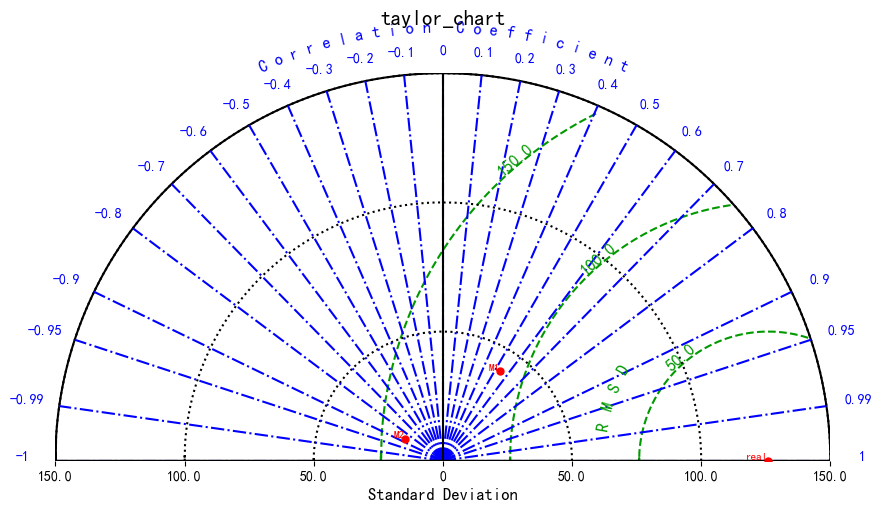

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd
import skill_metrics as sm
plt.figure(figsize=(10, 8), dpi=100)  # 设置图形大小和分辨率
data = pd.read_excel('data.xlsx')
taylor_stats1 = sm.taylor_statistics(data['pred1'],data['ref'])
taylor_stats2 = sm.taylor_statistics(data['pred2'],data['ref'])
print(taylor_stats1)
print(taylor_stats2)
sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][0],taylor_stats1['sdev'][1], 
                 taylor_stats2['sdev'][1]])
crmsd = np.array([taylor_stats1['crmsd'][0],taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                  taylor_stats2['crmsd'][1]])
ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][0],taylor_stats1['ccoef'][1], 
                  taylor_stats2['ccoef'][1]])
# 开始绘图
label=['real','real','M1','M2']
sm.taylor_diagram(sdev,crmsd,ccoef,markerLabel = label,markerLabelColor='r')
text_font = {'size':'15','weight':'bold','color':'black'}
plt.title("taylor_chart",fontdict=text_font,pad=35)
plt.show()


ValueError: unknown color specifier: 'steal'

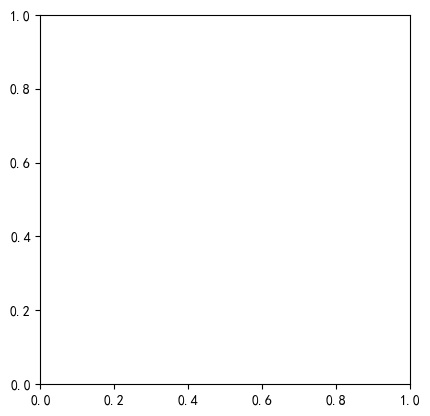

In [33]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
data='无 有 无 最大 最小 最大 最大 无 无 无 有 中 吃吃 你 我 他 小猫 狗狗 猫猫 狗猫 猫狗 猪猪 不吃 吃 太吃 太贵 太晚 睡觉 玩耍 写作业 难贵 吃 太贵 太晚 睡觉 玩耍 写作业 难 太晚 睡觉 玩耍 写作业 难吃 好吃 中等 中等 无 有 无 最大 最小 最大 最大 无 无 无 有 中 中等 中等 无 有 无 最大 不好 好 坏 不坏 吃掉 睡觉 最小 最大 最大 无 无 无 有 中 中等 中等 嘎嘎 哼唧 揍你 小狗 扭屁股 好好 坏坏 你好 你坏 无 有 无 最大 最小 最大 最大 无 无 无 有 中 中等 中等 无 有 无 最大 最小 最大 最大 无 无 无 有 中 中等 中等'
background = Image.open('象.png')
graph = np.array(background)
wc=WordCloud(font_path=r'SimHei.ttf',background_color='white',width=1000,height=800,mask = graph,min_font_size=2,contour_width=3,contour_color='steal').generate(data)
plt.imshow(wc)    #显示图像
plt.axis('off')    #关闭坐标轴图框
#plt.show()
#除了jupyter以外的软件需要用plt.show()


<>:16: SyntaxWarning: invalid escape sequence '\ '
<>:17: SyntaxWarning: invalid escape sequence '\W'
<>:16: SyntaxWarning: invalid escape sequence '\ '
<>:17: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Hwh\AppData\Local\Temp\ipykernel_11084\1054351464.py:16: SyntaxWarning: invalid escape sequence '\ '
  data='. . ? 我 . . , / + - * / < > ; : \ !'
C:\Users\Hwh\AppData\Local\Temp\ipykernel_11084\1054351464.py:17: SyntaxWarning: invalid escape sequence '\W'
  wc = WordCloud(font_path = "C:\Windows\Fonts\Microsoft YaHei UI\msyh.ttc",width=700, height=800, background_color='white',mask=graph,contour_width=3,contour_color='steelblue').generate(data)


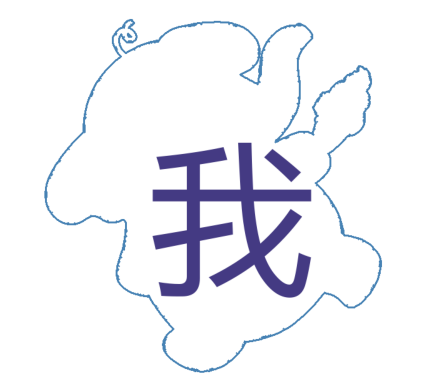

In [ ]:
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np

# 读取文本文件
text = open(r'12.txt', encoding="utf-8").read()
# 对文本进行分词，默认精确模式
text1=jieba.cut(text)
# 以空格作为分隔符，将分词后的所有字符串合并成一个新的字符串
text = ' '.join(text1)
# 根据分词结果产生词云
background = Image.open("qwq.png")
graph = np.array(background)
data='. . ? 我 . . , / + - * / < > ; : \ !'
wc = WordCloud(font_path = "C:\Windows\Fonts\Microsoft YaHei UI\msyh.ttc",width=700, height=800, background_color='white',mask=graph,contour_width=3,contour_color='steelblue').generate(data)
# 以图片的形式显示词云
plt.imshow(wc)
# 不显示图像坐标系
plt.axis("off")
# 显示图像
plt.show()


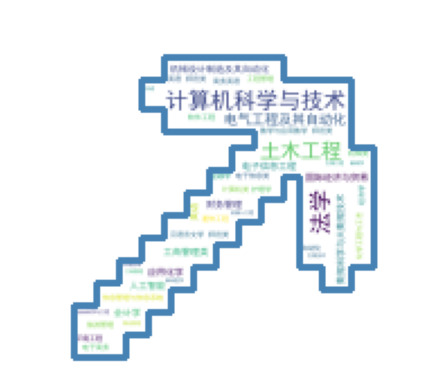

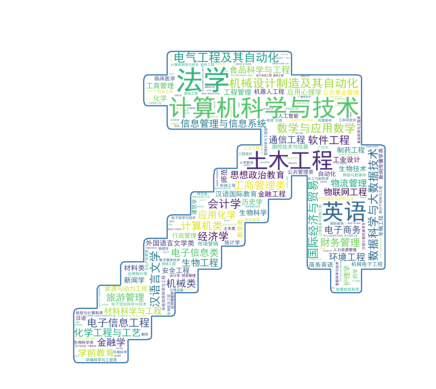

In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas
from PIL import Image
import numpy as np
import re
#文件导入, engine：可以接受的参数有“ xlrd”，“ openpyxl”或“ odf”，用于使用第三方的库去解析excel文件
College2023 = pandas.read_excel('College.xlsx',engine='openpyxl',sheet_name='2020')
word=''
tmp=''
for i in College2023['Subject']:
    tmp=i
    word+=tmp[2:]+' ' 
word = re.sub('中外合作办学', "", word)
word = re.sub('地方专项计划', "", word)
word = re.sub('校企合作', "", word)
###绘图
background = Image.open(r"qqwq.png")
graph = np.array(background)
wc=WordCloud(font_path='SimHei.ttf',background_color='white',width=3000,height=2400,mask = graph,min_font_size=2,contour_width=3,contour_color='steelblue').generate(word)
plt.imshow(wc)
plt.axis('off')
plt.show()


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
 
# 自定义数据,A-D四个变量，var1-5:5个维度。
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 45],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14],
#'var6': [23, 25, 18, 23]
})
#获取除了第一列之外的所有列名 
var_names = df.columns[1:]
print(df)
print('------------------------')
print(var_names)

  group  var1  var2  var3  var4  var5
0     A  38.0    29     8     7    28
1     B   1.5    10    39    31    15
2     C  30.0     9    23    33    32
3     D  45.0    34    24    14    14
------------------------
Index(['var1', 'var2', 'var3', 'var4', 'var5'], dtype='object')


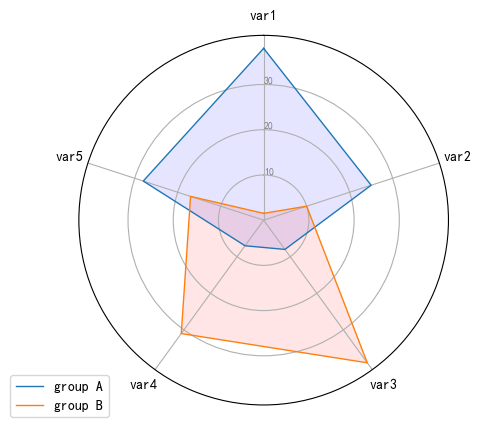

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
 
# 自定义数据
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [25, 10, 9, 34],
'var3': [8, 39, 23, 4],
'var4': [7, 31, 33, 14],
'var5': [28, 17, 62, 14]
})

#取到var1-var5的标签值 
var_names = df.columns[1:]
 
# 计算每个轴的角度，整个圆的角度认为是2Π
angles = [i/float(len(var_names))*2*math.pi for i in range(len(var_names))]  # 每个变量的角度位置
angles += angles[:1]  # 闭合圆形图，需要在末尾增加一个与起始相同的值
 
 
# 初始化布局
ax = plt.subplot(111, polar=True)
 
# 偏移-将第一个轴位于顶部
ax.set_theta_offset(math.pi / 2)
#设置顺时针方向或逆时针方向，默认是逆时针，-1为顺时针
ax.set_theta_direction(-1)
 
# 添加多个极坐标图
# 绘制第一个图
#获取第一行数据，剔除group。values.flatten().tolist()的作用是将多维数组转换为一维数组，并将其转换为列表。
values = df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
#print(values)

# 绘制第二个图
#获取第二行数据，剔除group。values.flatten().tolist()的作用是将多维数组转换为一维数组，并将其转换为列表。
values = df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
#print(values)
 
plt.xticks(angles[:-1], var_names)
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
 
plt.show()

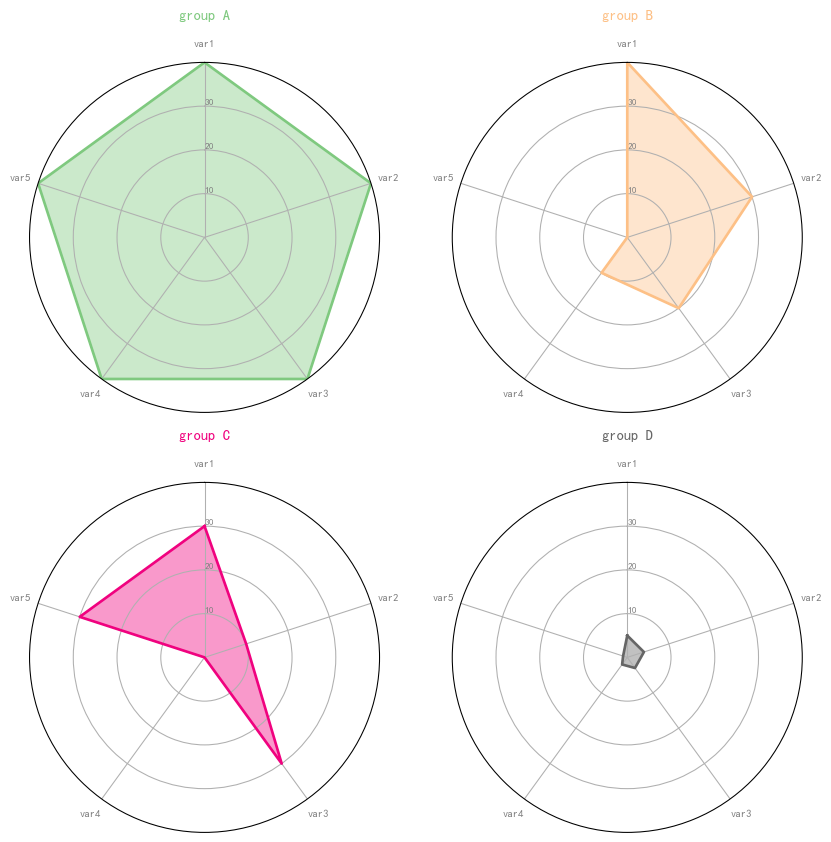

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import math
 
# 自定义数据
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [40, 40, 30, 5],
'var2': [40, 30, 10, 4],
'var3': [40, 20, 30, 3],
'var4': [40, 10, 0, 2],
'var5': [40, 0, 30, 1]
})
 
 
# 自定义函数-每一行绘制一个雷达图
def make_spider(row, title, color):
 
 # 计算维度个数，本例共4个变量，每个变量有五个维度var1-var5,N=5
    categories = df.columns[1:]
    N = len(categories)

 # 计算角度
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]
 
 # 初始化布局,下面for in循环row值从0开始
    ax = plt.subplot(2,2,row+1, polar=True)
 
 # 偏移-将第一个轴位于顶部，设置顺时针方向
    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)
 
 # x标签需要5个维度值，#angles[:-1]表示在原来angles基础上（6个值）减少最后一个值 
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
 # y标签
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)
 
 # 画雷达图，因为要闭合，需要六个值
    values = df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
 # 标题
    plt.title(title, size=11, color=color, y=1.1)
 
# 图标参数,可以把下面两行加注释，观察图的变化
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# 创建一个颜色映射,len(df.index)=4,所以取色带Set2中的4种颜色
my_palette = plt.get_cmap("Accent", len(df.index))
#print(len(df.index)) 

# 绘制多个图，本例绘制了4个图，"group"+df['group'][row]的意思是group A-D中的任意一个
for row in range(0, len(df.index)):
    make_spider(row=row, title='group '+df['group'][row], color=my_palette(row))
plt.savefig('雷达图.jpg',dpi=1000)
plt.show()


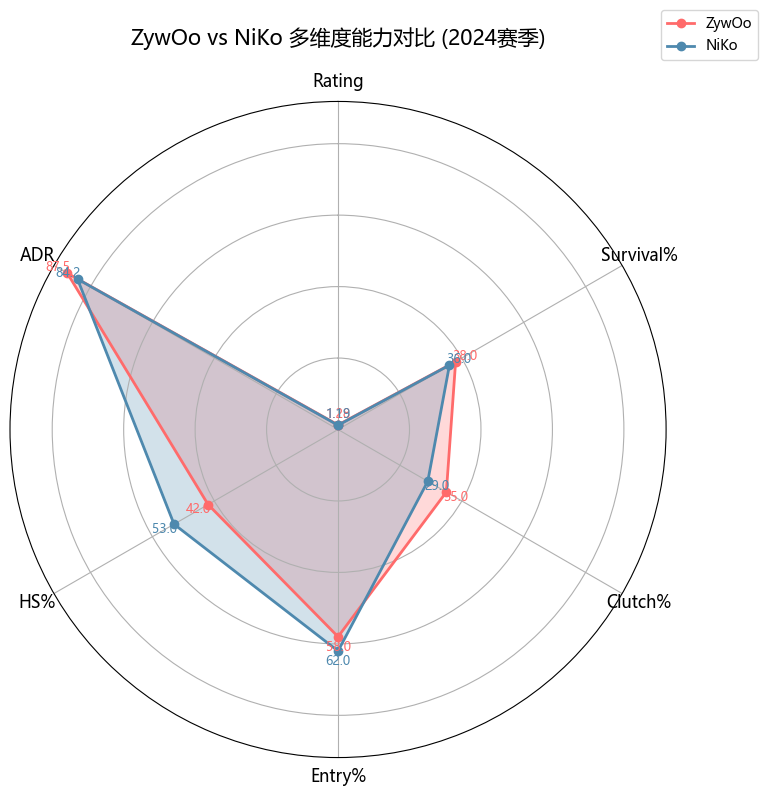

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# 配置中文字体支持
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  

# 数据定义
labels = np.array(['Rating', 'ADR', 'HS%', 'Entry%', 'Clutch%', 'Survival%'])
zywoo_data = np.array([1.28, 87.5, 42, 58, 35, 38])
niko_data = np.array([1.19, 84.2, 53, 62, 29, 36])

# 极坐标计算（闭环处理）
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
zywoo_data = np.concatenate((zywoo_data, [zywoo_data[0]]))
niko_data = np.concatenate((niko_data, [niko_data[0]]))
angles += angles[:1]

# 绘图设置
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': 'polar'})
ax.plot(angles, zywoo_data, 'o-', color='#FF6B6B', linewidth=2, label='ZywOo')
ax.fill(angles, zywoo_data, color='#FF6B6B', alpha=0.25)
ax.plot(angles, niko_data, 'o-', color='#4E89AE', linewidth=2, label='NiKo')
ax.fill(angles, niko_data, color='#4E89AE', alpha=0.25)

# 极坐标美化
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels([])  # 隐藏径向刻度
ax.set_theta_offset(np.pi/2)  # 旋转0度位置至顶部
ax.set_rlabel_position(30)  # 刻度标签位置

# 添加数值标签
for i, (z_val, n_val) in enumerate(zip(zywoo_data[:-1], niko_data[:-1])):
    angle_rad = angles[i]
    ax.text(angle_rad, z_val+3, f'{z_val}', ha='center', va='center', fontsize=9, color='#FF6B6B')
    ax.text(angle_rad, n_val+3, f'{n_val}', ha='center', va='center', fontsize=9, color='#4E89AE')

# 标题与图例
plt.title('ZywOo vs NiKo 多维度能力对比 (2024赛季)', fontsize=15, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.15))

plt.tight_layout()
plt.savefig('zywoo_vs_niko_radar.png', dpi=300)
plt.show()